# Social inequality and malnutrition in Asia
An analysis of the relation between social inequality and malnutrition in Asia. 

Authors: 
<br /> Vilohit Kaza (6036368)
<br /> Tushar (<span style="color: red">last name, studentnumber</span>) 
<br /> Pedram Pishahang (5357284)

This document was created for the subject EPA112A (Programming for Data Science) by <b> Group 7</b>. 


## Introduction
<span style="color:blue"> Assignment: include a problem statement and your research question(s). You can pick one SDG as a starting point (frame) for your problem </span>

In this assignment, an original and non-trivial data analysis will be made of the relation between social inequality and malnutrition in Asia. 

### Chosen Sustainable Development Goals (SDG's)
This analysis focuses on SDG 2 ("End hunger, achieve food security and improve nutrition and promote sustainable agriculture") and SDG 10 ("Reduce inequality within and among countries"). [1][2]

### Problem statement and research questions
While there has been some progress towards reaching global nutrition goals, almost nine percent of the population in Asia was malnourished in 2022. This region also accounts for half of the world's undernourished people, and there are more severely food insecure individuals in Southern Asia than any other subregions in the world [3]. At the same time, Asia can be characterised as a region with high levels of income inequality, especially in South Asia and East Asia. It is known that high income inequality can have significant negative effects on many different factors [4]. In this analysis, we will specifically focus on the effect of income inequality on undernourishment in Asia. In order to analyse this, the following <b>general research question</b> has been formulated: 

<br />
<i>What is the relation between economic and social inequality and undernourishment in Asian countries, and can we predict the rate of undernourishment in Asian countries in the coming 20 years based on economic and social inequality? </i>
<br />

<br /> 
In order to quantify and eventually answer the general research question, the following <b>specific research questions</b> have been formulated:

1. <i> What are the trends in income inequality in Asian countries in the period of 2000-2020? Will income inequality rise in the next 20 years based on this trend? </i>
2. <i> What are the trends in undernourishment in Asian countries in the period of 2000-2020? Will undernourishment rise in the next 20 years based on this trend? </i>
3. <i> How will undernourishment change based on the income inequality in Asian countries in the next 20 years? </i>
4. <i> Do gender equality, education attainment and literacy rates have an influence on the undernourishment in Asian countries? </i>


<br />
For clarity, <b> Asia </b> is defined as the following regions and countries with the World Bank Databank [5] and World Inequality Dataset [9] country codes:
<br />

* <b> Central Asia: </b> Kazachstan; Kyrgyzstan; Tajikistan; Turkmenistan; Uzbekistan;
    * World Bank codes: KAZ, KGZ, TJK, TKM, UZB
    * World Inequality Dataset codes: KZ, KG, TJ, TM, UZ
* <b> Eastern Asia: </b> China; China, Hong Kong Special Administrative Region; China, Macao Special Administrative Region; Democratic People's Republic of Korea; Japan; Mongolia; Republic of Korea
    * World Bank codes: CHN, HKG, MAC, PRK, JPN, MNG, KOR
    * World Inequality Dataset codes: CN, HK, MO, KP, JP, MN, KR
* <b> South-Eastern Asia: </b>  Brunei Darussalam; Cambodia; Indonesia; Lao People's Democratic Republic; Malaysia; Myanmar; Philippines; Singapore; Thailand; Timor-Leste; Viet Nam
    * World Bank codes: BRN, KHM, IDN, LAO, MYS, MMR, PHL, SGP, THA, TLS, VNM
    * World Inequality Dataset codes: BN, KH, ID, LA, MY, MM, PH, SG, TH, TL, VN
* <b> Southern Asia: </b>  Afghanistan; Bangladesh; Bhutan; India; Iran (Islamic Republic of); Maldives; Nepal; Pakistan; Sri Lanka
    * World Bank codes: AFG, BGD, BTN, IND, IRN, MDV, NPL, PAK, LKA
    * World Inequality Dataset codes: AF, BD, BT, IN, IR, MV, NP, PK, LK
* <b> Western Asia: </b>  Armenia; Azerbaijan; Bahrain; Cyprus; Georgia; Iraq; Israel; Jordan; Kuwait; Lebanon; Oman; Qatar; Saudi Arabia; State of Palestine; Syrian Arab Republic; Türkiye; United Arab Emirates; Yemen
    * World Bank codes: ARM, AZE, BHR, CYP, GEO, IRQ, ISR, JOR, KWT, LBN, OMN, QAT, SAU, PSE, SYR, TUR, ARE, YEM
    * World Inequality Dataset codes: AM, AZ, BH, CY, GE, IQ, IL, JO, KW, LB, OM, QA, SA, PS, SY, TR, AE, YE
<br />

In this analysis, we will look at the trends on a country level (so for each specific country in Asia). <b> if no data is available for a certain country, this will be mentioned. </b> 

<span style="color:red"> ALSO ON A REGIONAL LEVEL OR ONLY ON COUNTRY SPECIFIC LEVEL? DECIDE LATER </span>


### Importing libraries
Here, we will start by importing all relevant libraries. 

<span style="color:red"> REMOVE LIBRARIES THAT WERE NOT USED AT THE END </span>

In [338]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns # later check if this is actually necessary
import wbdata as wb # make sure you have wbdata installed! 
import datetime as dt # necessary for data import from wbdata
import zipfile
import urllib.request
import os
import glob
import re
# import specific modules from sklearn for machine learning

## Datasets
<span style="color:blue"> Assignment: Present the data that you are going to use. Your data must come from at least two sources (one additional source aside from the World Bank data). </span>

In order to perform an analysis for the specific research questions, we will be using the indicators below:
- Prevalence of undernourishment (% of the population) 
    - from the World Bank Databank [7]
    - This indicator measures food deprivation based on the average food available for human consumption per person, the level of inequality in access to food, and the minimum calories required for an average person.
- Share of pre-tax national income by the top 10% (scale 0-1)
    - from the World Inequality Database [8]
- Share of the pre-tax national income by the bottom 50% (scale 0-1) 
    - from the World Inequality Database [8]
- Literacy rate, adult total (% of people ages 15 and above)
    - from the World Bank Databank [7]
- Education attainment, at least completed lower secondary, population 25+, total (%)
    - from the World Bank Databank [7]
- Women Busineess and the Law Index Score (scale 1-100)
    - from the World Bank Databank [7]
    - This indicator measures the economic and legal equality between men and women, with 1 being the lowest score (= highest inequality for women compared to men) and 100 being the highest score (= perfect equality between women and men)
    
<br />
Specifically, we will measure <b> income inequality </b> as the "P50/P10 ratio". This means that the income of the bottom 50% (50th percentile) is compared to the income of the top 10% (10th percentile). [6] This is calculated as follows:
<br />

- Income inequality = Share of pre-tax national income by the top 10% / Share of pre-tax national income by the bottom 50% 

## Preprocessing
<span style="color:blue"> Assignment: Explain how you clean, format and do any pre-processing work that you find useful, making the data useful for your goals. Implement the steps that you describe in python. </span>


### Importing data
Firstly, we import the data from the World Bank Databank [7] and World Inequality Database [8]:


#### World Bank Databank
Let's import the relevant data from the World Bank Databank. We know that the SDG Databank is source 46, and the relevant indicators have the following codes:
* Prevalence of undernourishment: SN.ITK.DEFC.ZS
* Literacy rate, adult total: SE.ADT.LITR.ZS
* Education rate, at least completed lower secondary 25+ total: SE.SEC.CUAT.LO.ZS
* Women Business and the Law index score: SG.LAW.INDX

In [303]:
# wb.get_countries()

In [171]:
# creating list of countries per region in Asia, in order to import the indicators for the right countries:
wbCA = ["KAZ", "KGZ", "TJK", "TKM", "UZB"] # CA = Central Asia
wbEA = ["CHN", "HKG", "MAC", "PRK", "JPN", "MNG", "KOR"] # EA = Eastern Asia
wbSEA = ["BRN", "KHM", "IDN", "LAO", "MYS", "MMR", "PHL", "SGP", "THA", "TLS", "VNM"] # SEA = South-Eastern Asia
wbSA = ["AFG", "BGD", "BTN", "IND", "IRN", "MDV", "NPL", "PAK", "LKA"] # SA = Southern Asia
wbWA = ["ARM", "AZE", "BHR", "CYP", "GEO", "IRQ", "ISR", "JOR", "KWT", "LBN", "OMN", 
      "QAT", "SAU", "PSE", "SYR", "TUR", "ARE", "YEM"] # WA = Western Asia
wbAsia = sorted(wbCA+wbEA+wbSEA+wbSA+wbWA) #creating a list of Asia in order all countries need to be requested

# dictionary of indicators and indicator names:
sdg_indic = {"SN.ITK.DEFC.ZS": "Prevalence of undernourishment (% of the population)",
             "SE.ADT.LITR.ZS": "Literacy rate, adult total (% of people ages 15 and above)",
             "SE.SEC.CUAT.LO.ZS": "Education attainment, at least completed lower secondary, population 25+, total (%)",
             "SG.LAW.INDX": "Women Busineess and the Law Index Score (scale 1-100)" }

# defining start and end date for the data that we want (period of 2000-2022):
start = dt.datetime(2000, 1, 1) # starting time: 1 january 2000
end = dt.datetime(2020, 12, 31) # end time: 31 december 2022

# Load World Bank data
def load_world_bank_data(indicators, asia_countries, start, end):
    # Fetch data using wbdata API
    wb_data = wb.get_dataframe(indicators=indicators, country=asia_countries, date=(start, end), freq="Y", source=46)
    wb_data.reset_index(inplace=True)  # Reset index for merging
    wb_data['date'] = wb_data['date'].astype('int')
    return wb_data
    
# getting the data from the World Bank Databank as a Pandas dataframe:
wbdata = load_world_bank_data(sdg_indic, wbAsia, start, end )
wbdata

,country,date,Prevalence of undernourishment (% of the population),"Literacy rate, adult total (% of people ages 15 and above)","Education attainment, at least completed lower secondary, population 25+, total (%)",Women Busineess and the Law Index Score (scale 1-100)
0,Afghanistan,2020,NaN,NaN,NaN,38.125
1,Afghanistan,2019,25.6,NaN,NaN,38.125
2,Afghanistan,2018,23.4,NaN,NaN,38.125
3,Afghanistan,2017,23.0,NaN,NaN,38.125
4,Afghanistan,2016,22.2,NaN,NaN,38.125
...,...,...,...,...,...,...
1045,"Yemen, Rep.",2004,28.3,54.099998,NaN,23.750
1046,"Yemen, Rep.",2003,28.0,NaN,NaN,23.750
1047,"Yemen, Rep.",2002,27.6,NaN,NaN,23.750
1048,"Yemen, Rep.",2001,26.7,NaN,NaN,23.750


#### World Inequality Database 
Let's import the relevant data from the World Inequality Database. Since there is no easy to use library to do this, we must do the following:
1. Import data from web in order to have the latest data (by bulk downloading the data from [8], using ...
2. Extract the data from the zip file and select the relevant documents based on the country codes from [9]
3. <span style="color:red"> Select correct codes for the income top 10% and bottom 50% based on [9] ... </span>


The indicator we need from here is the P50/P10 ratio. (FIGURE OUT HOW TO GET THIS INDICATOR FROM THE DATA BASED ON [9])


In [172]:
# creating list of countries per region in Asia, in order to correct data:
# indicator names based on [9]:
widCA = ["KZ", "KG", "TJ", "TM", "UZ"]
widEA =["CN", "HK", "MO", "KP", "JP", "MN", "KR"]
widSEA =["BN", "KH", "ID", "LA", "MY", "MM", "PH", "SG", "TH", "TL", "VN"]
widSA = ["AF", "BD", "BT", "IN", "IR", "MV", "NP", "PK", "LK"]
widWA = ["AM", "AZ", "BH", "CY", "GE", "IQ", "IL", "JO", "KW", "LB", "OM", "QA", "SA", "PS", "SY", "TR", "AE", "YE"]
widAsia = sorted(widCA+widEA+widSEA+widSA+widWA)

In [290]:
# Function to load WID data
def load_asian_wid_data(filepath, country_codes, mapping_codes):
    wid_data = pd.read_excel(filepath, sheet_name=0)
    wid_data.set_index('Year', inplace=True)

    asian_income_ratios = pd.DataFrame()

    for code in country_codes:
        top10_col = next((col for col in wid_data.columns if re.match(rf'^sptinc_p90p100_z_{code}', col)), None)
        bottom50_col = next((col for col in wid_data.columns if re.match(rf'^sptinc_p0p50_z_{code}', col)), None)

        if top10_col and bottom50_col:
            wid_data[f'Income_ratio_{code}'] = wid_data[top10_col] / wid_data[bottom50_col]
            country_data = wid_data[[f'Income_ratio_{code}']].copy()
            country_data.columns = ['Income_ratio_top10_bottom50']
            country_data['country'] = code
            country_data.reset_index(inplace=True)
            asian_income_ratios = pd.concat([asian_income_ratios, country_data], axis=0)
    asian_income_ratios['country'] = asian_income_ratios['country'].map(mapping_codes)
    asian_income_ratios['date'] = asian_income_ratios['Year']  # Rename 'Year' column to 'date' for merging
    asian_income_ratios.drop(columns=['Year'], inplace=True)
    asian_income_ratios.sort_values(by=['country', 'date'], inplace=True)

    return asian_income_ratios
    
wid_filepath = './wid_data.xlsx'
# Create a dictionary with country codes to map with World Bank Data country names. Not sure if there is a better way to do this.
wid_codes = {
    "KZ": "Kazakhstan",
    "KG": "Kyrgyz Republic",
    "TJ": "Tajikistan",
    "TM": "Turkmenistan",
    "UZ": "Uzbekistan",
    "CN": "China",
    "HK": "Hong Kong SAR, China",
    "MO": "Macao SAR, China",
    "KP": "Korea, Dem. People's Rep.",
    "JP": "Japan",
    "MN": "Mongolia",
    "KR": "Korea, Rep.",
    "BN": "Brunei Darussalam",
    "KH": "Cambodia",
    "ID": "Indonesia",
    "LA": "Lao PDR",
    "MY": "Malaysia",
    "MM": "Myanmar",
    "PH": "Philippines",
    "SG": "Singapore",
    "TH": "Thailand",
    "TL": "Timor-Leste",
    "VN": "Vietnam",
    "AF": "Afghanistan",
    "BD": "Bangladesh",
    "BT": "Bhutan",
    "IN": "India",
    "IR": "Iran, Islamic Rep.",
    "MV": "Maldives",
    "NP": "Nepal",
    "PK": "Pakistan",
    "LK": "Sri Lanka",
    "AM": "Armenia",
    "AZ": "Azerbaijan",
    "BH": "Bahrain",
    "CY": "Cyprus",
    "GE": "Georgia",
    "IQ": "Iraq",
    "IL": "Israel",
    "JO": "Jordan",
    "KW": "Kuwait",
    "LB": "Lebanon",
    "OM": "Oman",
    "QA": "Qatar",
    "SA": "Saudi Arabia",
    "PS": "West Bank and Gaza",
    "SY": "Syrian Arab Republic",
    "TR": "Turkey",
    "AE": "United Arab Emirates",
    "YE": "Yemen, Rep.",
}
widAsia = sorted(widCA+widEA+widSEA+widSA+widWA)
# Load WID data for Asian countries
asian_wid_data = load_asian_wid_data(wid_filepath, widAsia, wid_codes)

In [291]:
# Merge dataset and dataset
merged_df = pd.merge(wbdata, asian_wid_data, on=['country', 'date'], how='outer')
# merged_df

In [305]:
#For the values which are NaN as seen above, we set them to 0
def fill_nan_with_country_means(df, columns):
    """
    Fill NaN values in specified columns with the mean of the respective column 
    per country.
    """
    # Step 1: Create a copy of the DataFrame to avoid changing the original data
    df_filled = df.copy()
    
    # Step 2: Group by 'country' and calculate the mean for the specified columns
    for col in columns:
        # Compute the mean per country
        country_means = df_filled.groupby('country')[col].mean()
        
        # Fill NaN values in the original DataFrame with the country mean
        df_filled[col] = df_filled[col].fillna(df_filled['country'].map(country_means))
        
    return df_filled

columns_to_fill = merged_df.columns[2:].tolist() # Get the different criterion

merged_df_filled = fill_nan_with_country_means(merged_df, columns_to_fill) # Fill the NaN values per country with the mean. 

In [306]:
# clean data / look for countries which only have NaN values? 
merged_df_filled

,country,date,Prevalence of undernourishment (% of the population),"Literacy rate, adult total (% of people ages 15 and above)","Education attainment, at least completed lower secondary, population 25+, total (%)",Women Busineess and the Law Index Score (scale 1-100),Income_ratio_top10_bottom50
0,Afghanistan,2000,29.731579,31.448851,NaN,26.250,2.442632
1,Afghanistan,2001,47.800000,31.448851,NaN,26.250,2.442632
2,Afghanistan,2002,45.600000,31.448851,NaN,26.250,2.442632
3,Afghanistan,2003,40.600000,31.448851,NaN,26.250,2.442632
4,Afghanistan,2004,38.000000,31.448851,NaN,26.250,2.442632
...,...,...,...,...,...,...,...
1045,"Yemen, Rep.",2016,46.100000,54.099998,NaN,26.875,6.226981
1046,"Yemen, Rep.",2017,46.600000,54.099998,NaN,26.875,6.226981
1047,"Yemen, Rep.",2018,45.400000,54.099998,NaN,26.875,6.226981
1048,"Yemen, Rep.",2019,45.400000,54.099998,NaN,26.875,6.226981


## Exploration
<span style="color:blue"> Assignment: Exploratory data analysis – get to know your data. </span> 

In this section, we will explore the data in order to provide some basic knowledge and get to know the data better.

<span style="color:red"> explain further after statistics have been made! </span>

    

In [307]:
# merged_df.groupby('country')['Income_ratio_top10_bottom50'].mean()

In [322]:
# exploring data ...
def get_top_bottom_countries(df, criterion, n=3):
    """
    Get the top 'n' and bottom 'n' countries based on a specified criterion.
    """
    # Check if the criterion exists in the DataFrame
    if criterion not in df.columns:
        raise ValueError(f"Criterion '{criterion}' not found in DataFrame columns.")

    # Get the top and bottom 'n' countries
    top_countries = df.groupby('country')[criterion].mean().nlargest(n)
    bottom_countries = df.groupby('country')[criterion].mean().nsmallest(n)

    return {
        'top': top_countries,
        'bottom': bottom_countries
    }

result = get_top_bottom_countries(merged_df_filled, columns_to_fill[3], n=5)

print(f"Top 5 Countries:")
print(result['top'])

print("\nBottom 5 Countries:")
print(result['bottom'])

Top 5 Countries:
country
Hong Kong SAR, China    87.589286
Cyprus                  86.577381
Korea, Rep.             80.297619
Lao PDR                 80.178571
Israel                  78.422619
Name: Women Busineess and the Law Index Score (scale 1-100), dtype: float64

Bottom 5 Countries:
country
Yemen, Rep.           25.684524
Kuwait                27.708333
West Bank and Gaza    27.946429
Iran, Islamic Rep.    28.630952
Qatar                 29.077381
Name: Women Busineess and the Law Index Score (scale 1-100), dtype: float64


In [318]:
def find_highest_lowest_correlation(df, column1, column2):
    """
    Find the countries with the highest and lowest correlation
    between two specified columns in the DataFrame.
    """
    # Step 1: Group by 'country' and calculate means for both columns
    country_means = df.groupby('country').agg({column1: 'mean', column2: 'mean'}).reset_index()
    
    # Step 2: Initialize lists to store correlation results
    correlation_results = []

    # Step 3: Calculate correlation for each country
    for country in country_means['country']:
        temp_df = df[df['country'] == country]

        # Ensure there are at least two unique values to compute correlation
        if len(temp_df) >= 2 and temp_df[column1].nunique() > 1 and temp_df[column2].nunique() > 1:
            corr = temp_df[column1].corr(temp_df[column2])
            correlation_results.append({'country': country, 'correlation': corr})

    # Convert to DataFrame
    correlation_df = pd.DataFrame(correlation_results)

    # Drop NaN values and check if there are valid correlations
    correlation_df = correlation_df.dropna()

    if not correlation_df.empty:
        # Find countries with the maximum and minimum correlation
        max_corr_country = correlation_df.loc[correlation_df['correlation'].idxmax()]
        min_corr_country = correlation_df.loc[correlation_df['correlation'].idxmin()]

        return {
            'max_correlation': {
                'country': max_corr_country['country'],
                'correlation': max_corr_country['correlation']
            },
            'min_correlation': {
                'country': min_corr_country['country'],
                'correlation': min_corr_country['correlation']
            }
        }
    else:
        return "No valid correlations to display."

# Update the criterion below to get a the correlation between them. 
result = find_highest_lowest_correlation(
    merged_df_filled,
    columns_to_fill[2], # Criterion 1
    columns_to_fill[3] #Criterion 2
)

# Output the results
print(f"Country with Highest Correlation: {result['max_correlation']['country']} with a correlation of {result['max_correlation']['correlation']:.2f}")
print(f"Country with Lowest Correlation: {result['min_correlation']['country']} with a correlation of {result['min_correlation']['correlation']:.2f}")


Country with Highest Correlation: Singapore with a correlation of 0.72
Country with Lowest Correlation: Mongolia with a correlation of -0.30


## Visualization
<span style="color:blue"> Assignment: Use multiple types of visualization on the data that make sense for your goal. </span>

In this section, we will visualize the data in order to provide insights. 

<span style="color:red"> explain further after visualizations have been made! </span>



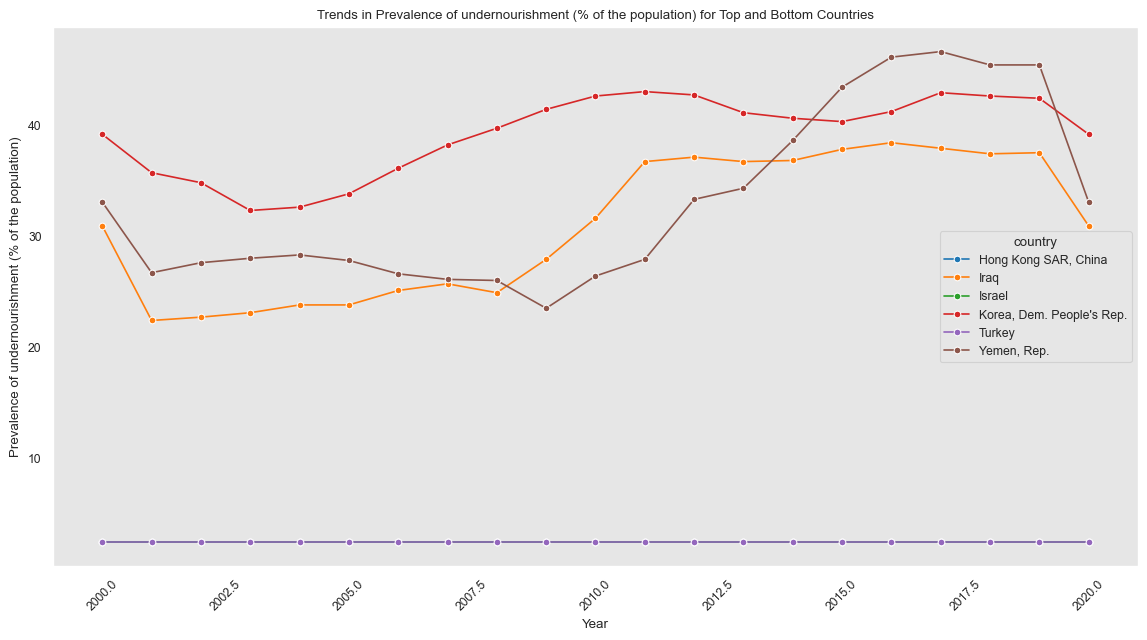

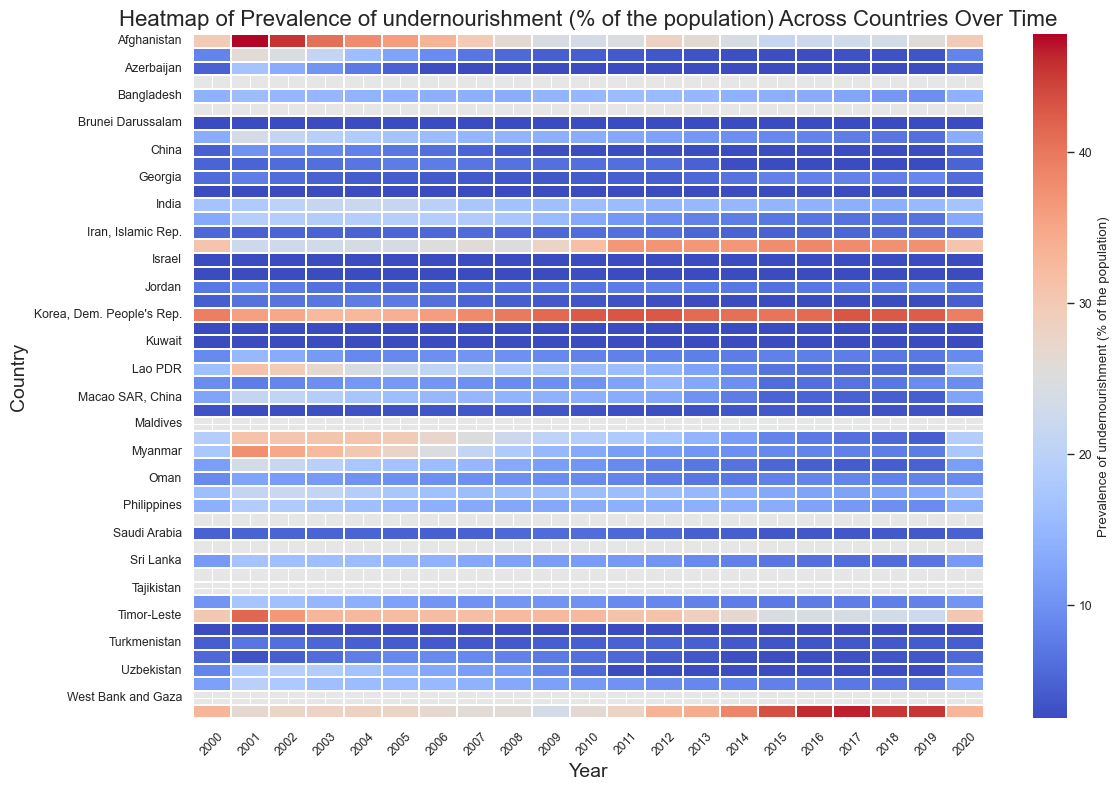

C:\Users\viloh\AppData\Local\Temp\ipykernel_39044\3625142662.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='country', y=criterion, palette='coolwarm', legend=True)


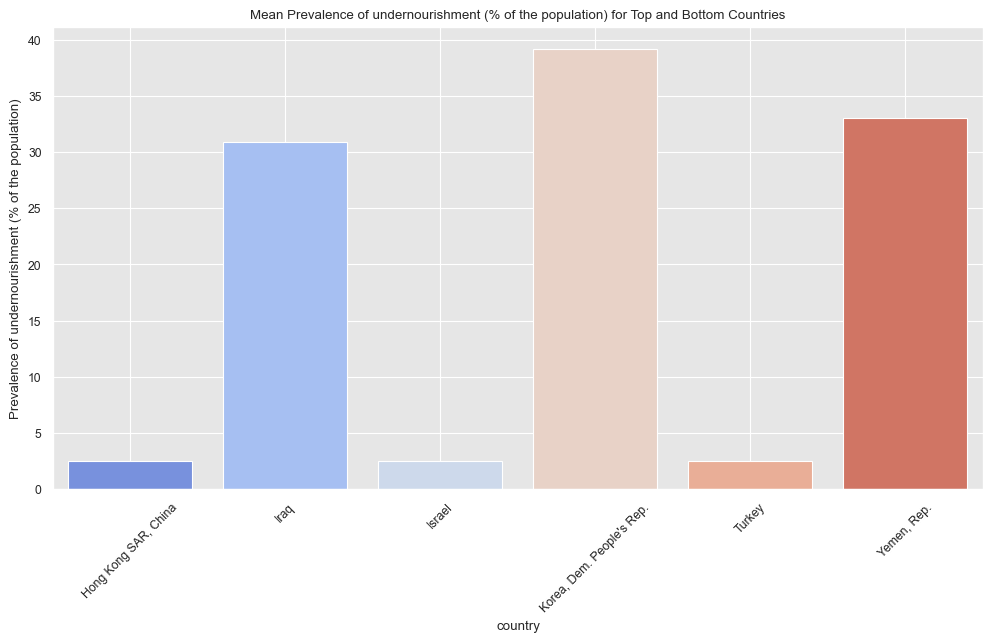

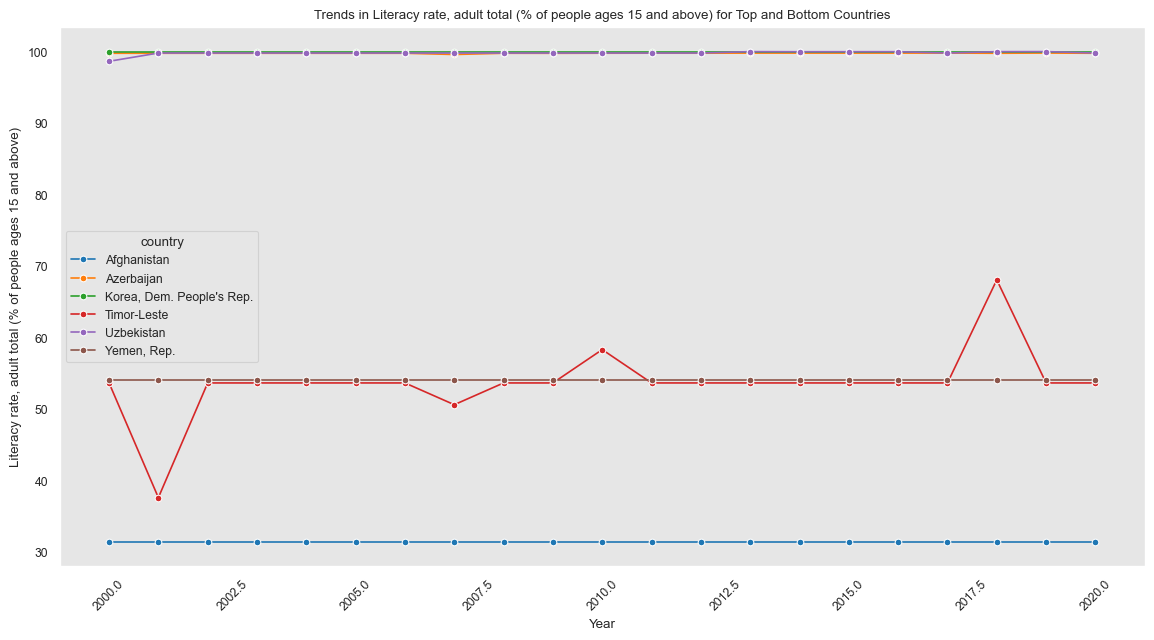

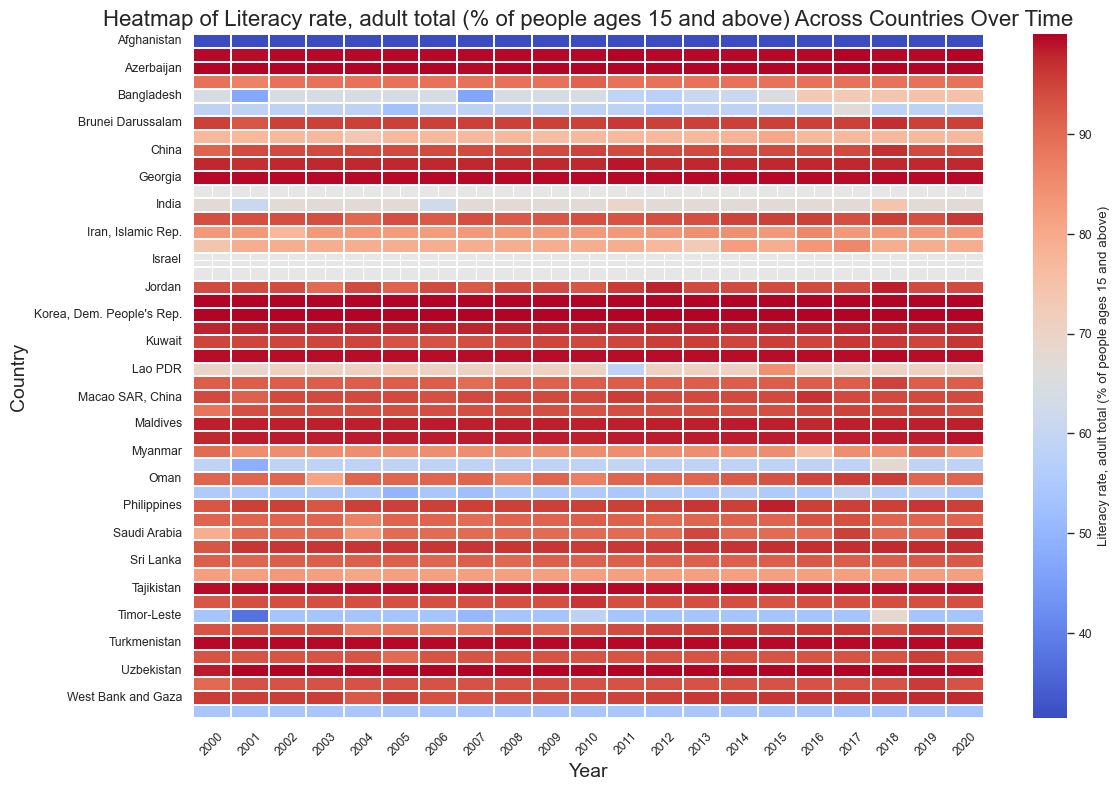

C:\Users\viloh\AppData\Local\Temp\ipykernel_39044\3625142662.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='country', y=criterion, palette='coolwarm', legend=True)


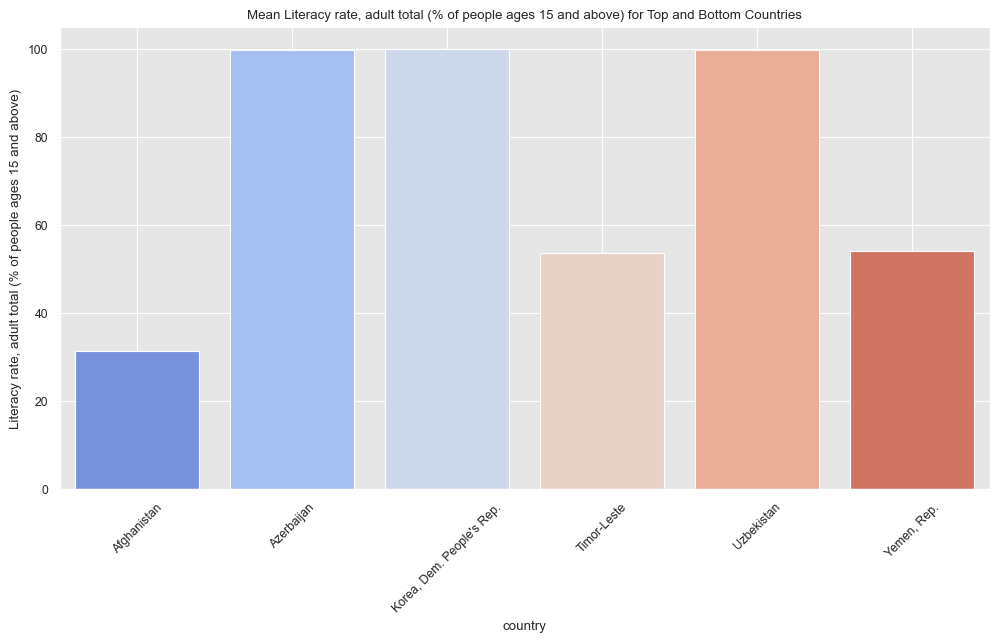

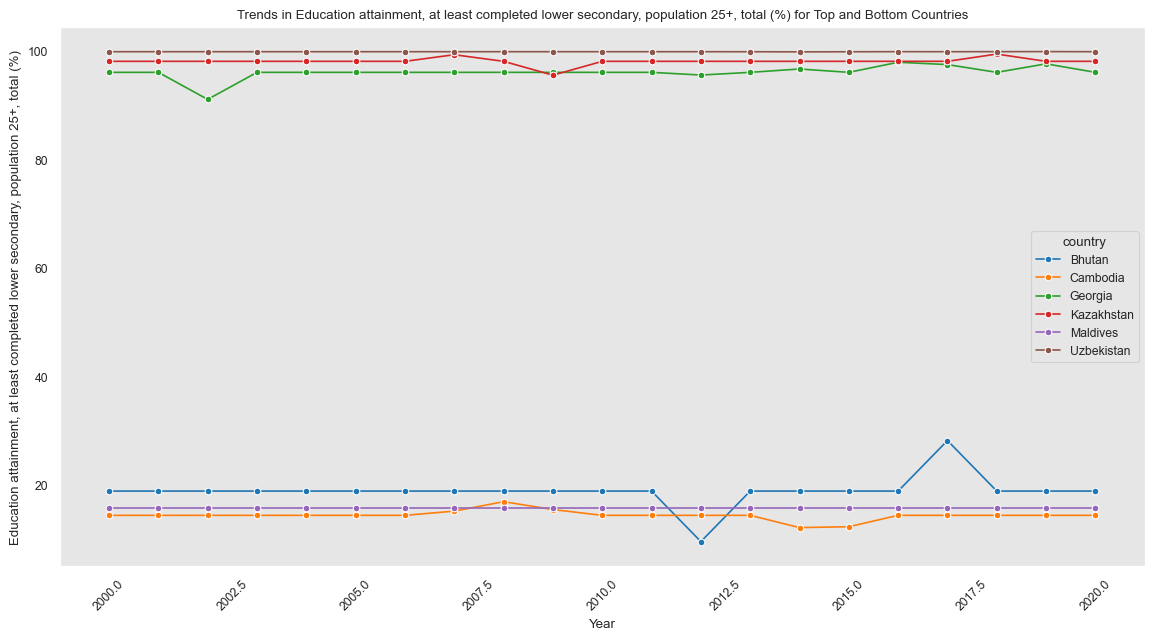

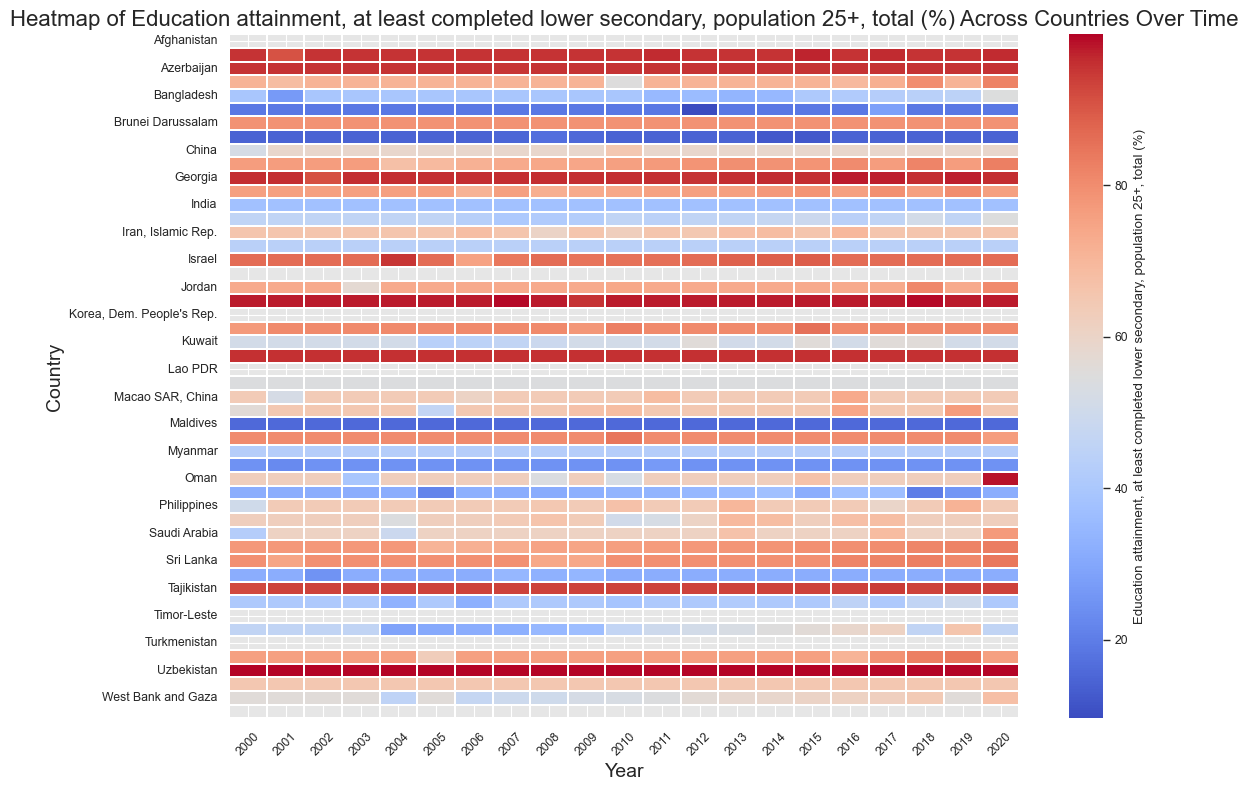

C:\Users\viloh\AppData\Local\Temp\ipykernel_39044\3625142662.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='country', y=criterion, palette='coolwarm', legend=True)


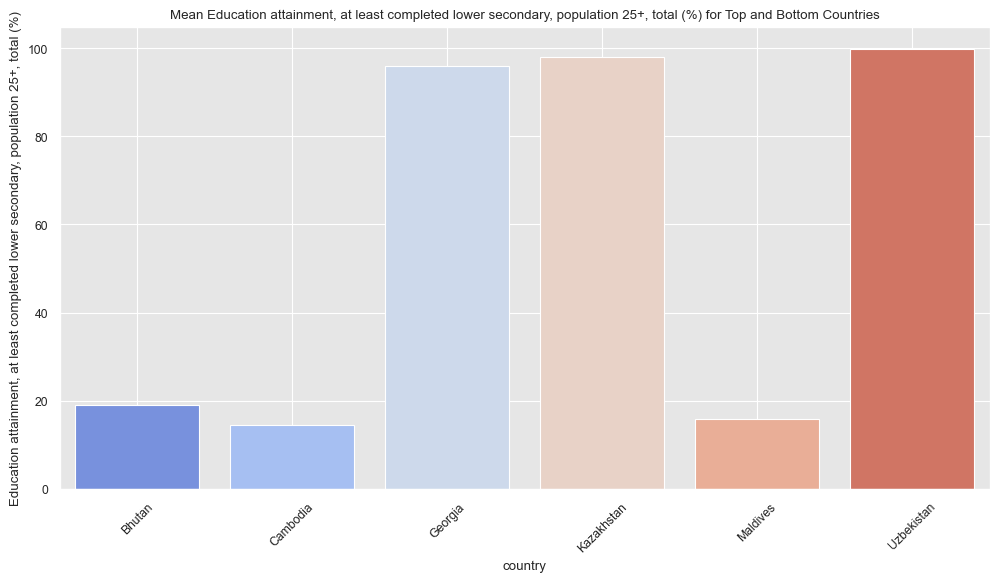

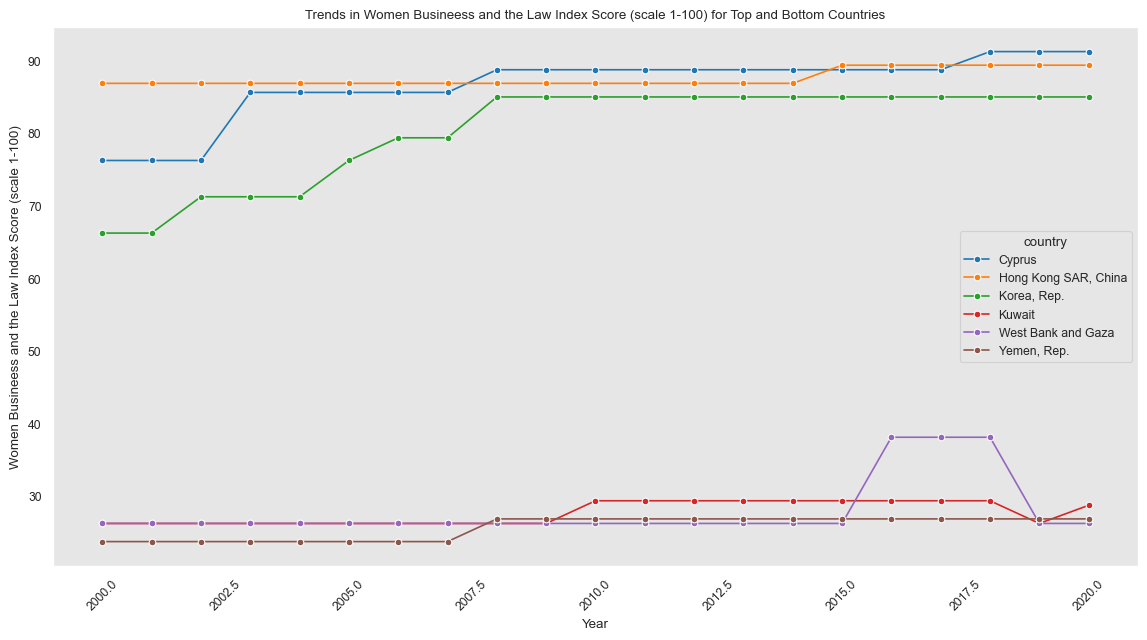

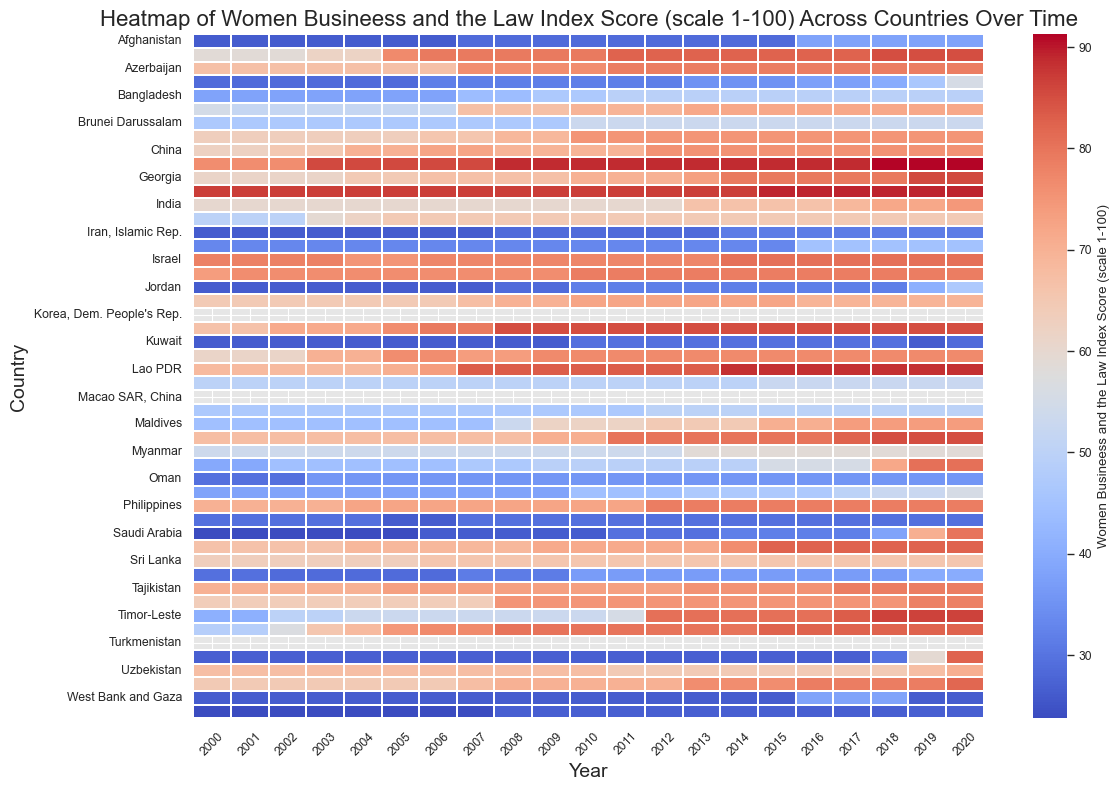

C:\Users\viloh\AppData\Local\Temp\ipykernel_39044\3625142662.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='country', y=criterion, palette='coolwarm', legend=True)


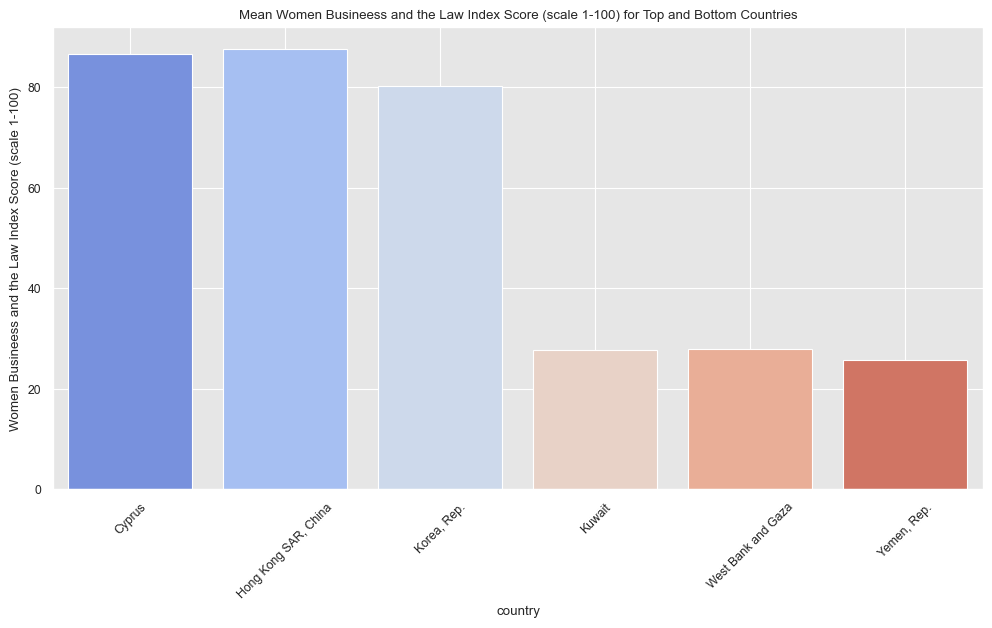

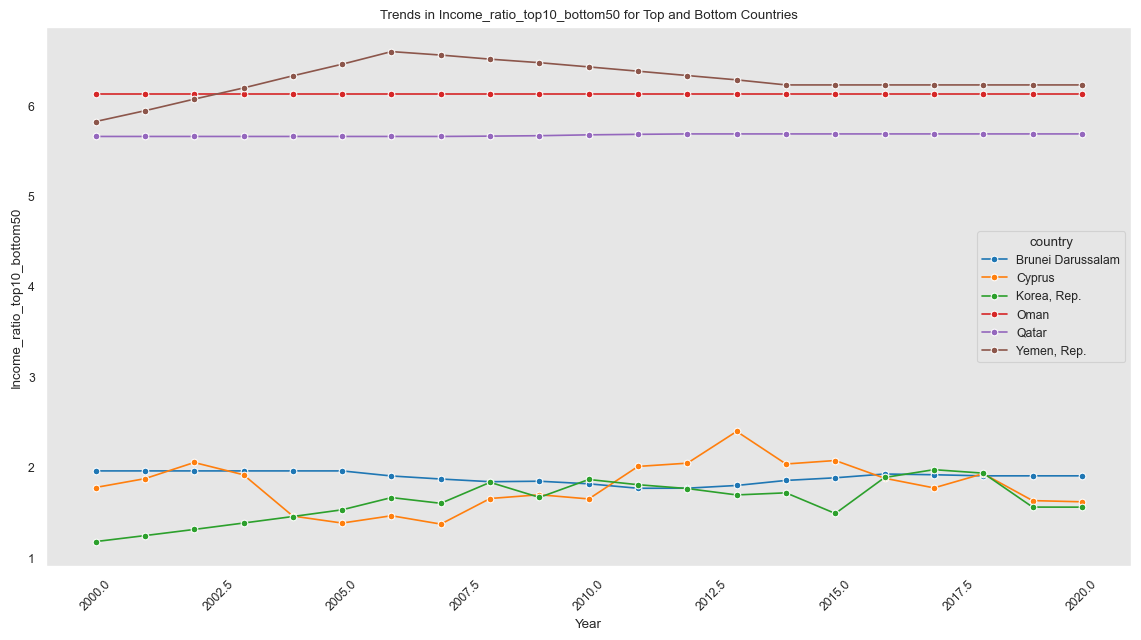

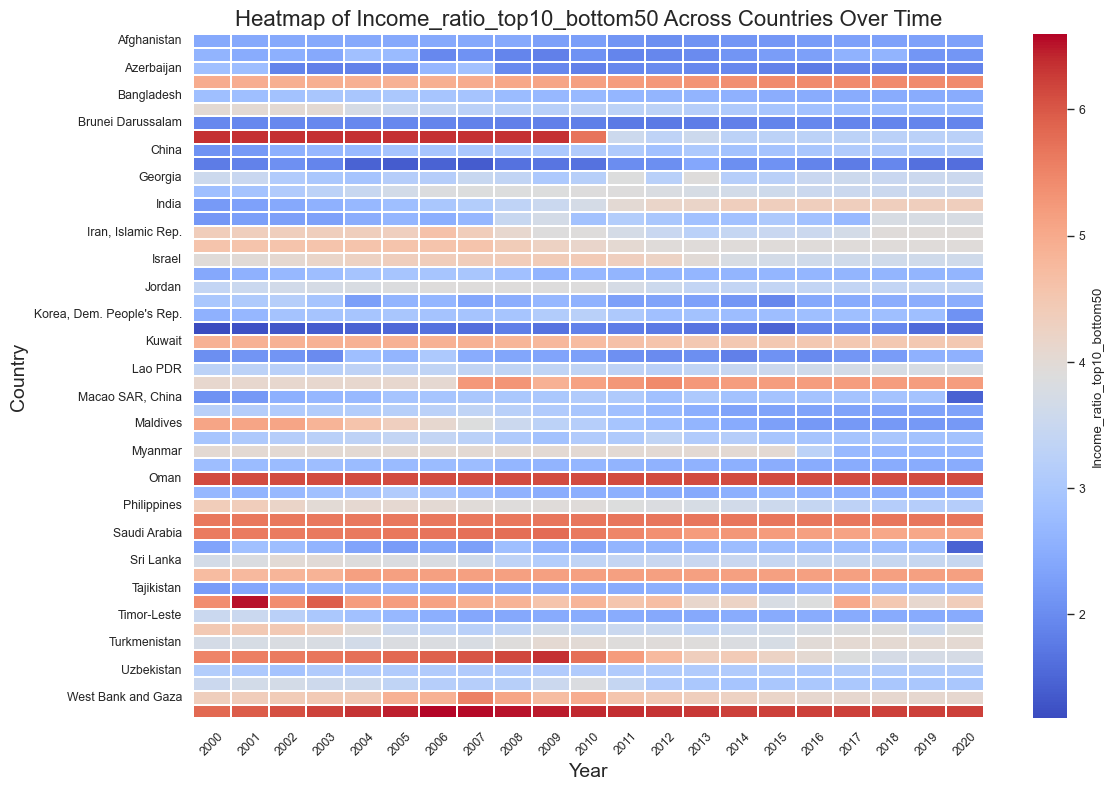

C:\Users\viloh\AppData\Local\Temp\ipykernel_39044\3625142662.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='country', y=criterion, palette='coolwarm', legend=True)


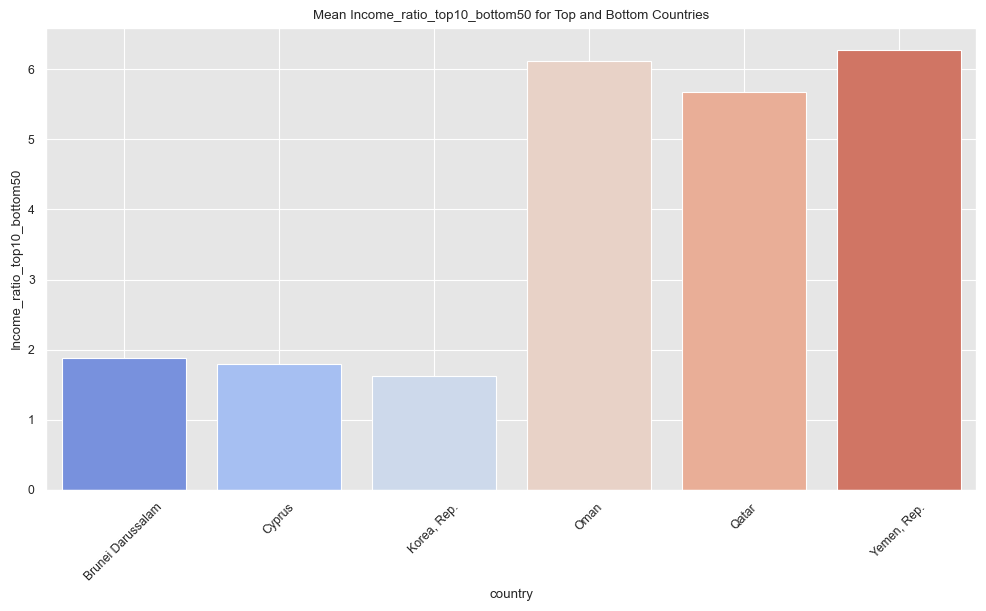

In [374]:
# visualizing data ...
def create_heatmap(df, criterion):
    """
    Create a heatmap for the specified criterion across countries and years.
    """
    # Check if the criterion exists in the DataFrame
    if criterion not in df.columns:
        raise ValueError(f"Criterion '{criterion}' not found in DataFrame columns.")
    
    # Pivot the DataFrame
    heatmap_data = df.pivot(index='country', columns='date', values=criterion)    
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=.25, cbar_kws={"label": criterion})
    
    # Set the title and labels
    plt.title(f'Heatmap of {criterion} Across Countries Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
for criterion in columns_to_fill:
    results = get_top_bottom_countries(merged_df_filled, criterion, n=3)
    
    top_countries = results['top'].index.tolist()
    bottom_countries = results['bottom'].index.tolist()
    countries_of_interest = top_countries + bottom_countries

    # Filter the DataFrame for the countries of interest
    filtered_df = merged_df_filled[merged_df_filled['country'].isin(countries_of_interest)]

    # Plot trends over time
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=filtered_df, x='date', y=criterion, hue='country', marker='o')
    plt.title(f'Trends in {criterion} for Top and Bottom Countries')
    plt.xlabel('Year')
    plt.ylabel(criterion)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

    create_heatmap(merged_df_filled, criterion)

    mean_values = merged_df_filled[merged_df_filled['country'].isin(countries_of_interest)].groupby('country').agg({
        criterion: 'mean'
    }).reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=mean_values, x='country', y=criterion, palette='coolwarm', legend=True)
    plt.title(f'Mean {criterion} for Top and Bottom Countries')
    plt.ylabel(criterion)
    plt.xticks(rotation=45)
    plt.grid(True) 
    plt.show()


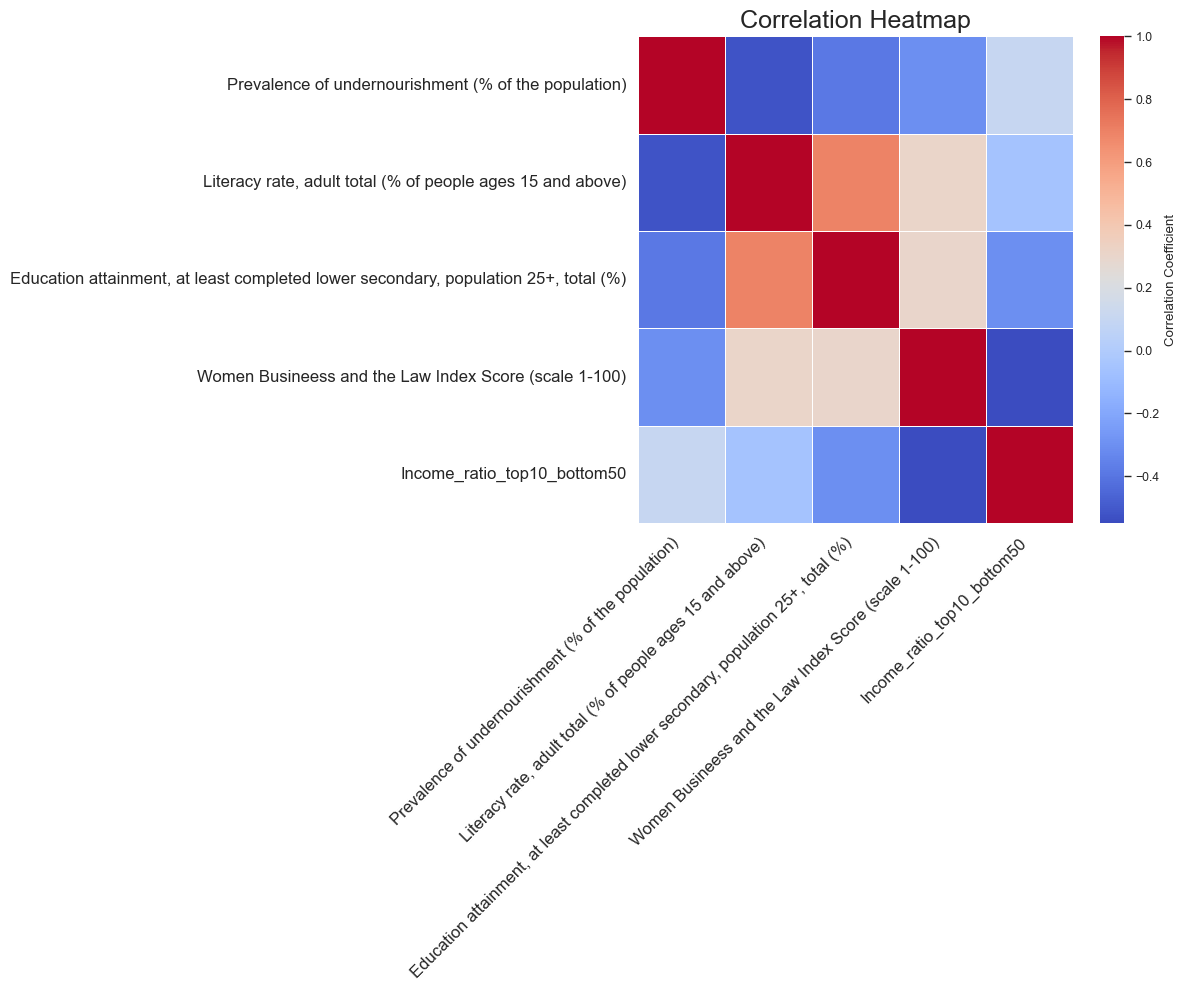

In [369]:
def plot_correlation_heatmap(df, columns):
    """
    Create a correlation heatmap for the specified columns.
    """
    # Calculate the correlation matrix
    corr = df[columns].corr()

    # Create the heatmap
    plt.figure(figsize=(12, 10))
    heatmap = sns.heatmap(corr,  fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"label": "Correlation Coefficient"})

    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right', fontsize=12)

    # Set the title and labels
    plt.title('Correlation Heatmap', fontsize=18)
    plt.gcf().set_facecolor('white')
    plt.grid(False) 
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_correlation_heatmap(merged_df_filled, columns_to_fill)


## Machine Learning
<span style="color:blue"> Assignment: Use at least one machine learning technique to make meaningful predictions over (part of) the data. </span>

In order to predict how the income inequality and undernourishment will develop in Asian countries, we will first extrapolate the data from (1) the income inequality and (2) the undernourishment in Asian countries. This will provide an answer to research questions 1 and 2. 
<br />

Afterwards, we will perform multiple regression analyses:
1. A regression of undernourishment based on income inequality per Asian country
2. A regression of undernourishment based on literacy rate per Asian country
3. A regression of undernourishment based on education attainment per Asian country
4. A regression of undernourishment based on geneder equality per Asian country

Based on the results of these analyses, we'll be able to conclude what the relation is between economic and social inequality and undernourishment in Asian countries, and whether we can predict undernourishment based on economic and social inequality in Asian countries over the next 20 years.

### Trends in inequality and undernourishment
In the section below, data will be analysed and extrapolated in order to find trends for the period of 2000-2020 and extrapolate trends for the coming 20 years regarding income inequality and undernourishment in Asian countries.

In [1]:
# part 1: using ML to extrapolate the income inequality per Asian country


In [7]:
# part 2: using ML to extrapolate the undernourishment per Asian country


### Regression analyses 
In the section below, data will be analysed through a regression model in order to find the relation between undernourishment (dependent variable) and income inequality, literacy rate, education attainment and gender equality (independent variables)

In [3]:
# part 3: using ML to perform a regression analysis of the undernourishment based on the income inequality


In [4]:
# part 4: using ML to perform a regression analysis of the undernourishment based on literacy rate


In [5]:
# part 5: using ML to perform a regression analysis of the undernourishment based on education attainment


In [ ]:
# part 6: using ML to perform a regression analysis of the undernourishment based on gender equality 
## (Women Business and the Law index score)



## Discussion 
<span style="color:blue"> Assignment: Interpret your results in relation to your research question. Were there any surprises in your research? How reliable do you think your results are? Are there any limitations to your analysis? </span>

In this section, we will interpret the results in relation to the research question.

<span style="color:red"> answer the main research question by answering all the specific research questions separately! </span>

<span style="color:red"> surprises </span>

<span style="color:red"> reliability of results </span>

<span style="color:red"> limitations to analysis </span>
- economic inequality only based on income and not wealth
- gender equality only based on one index
- regression only one way -> but undernourishment might also affect income inequality, so might be good to also research it the other way around


## Conclusion
<span style="color:blue"> Assignment: what did you learn? </span>

<span style="color:red"> It can be concluded that ... </span>

## References

<br />
[1] https://sdgs.un.org/goals/goal2#targets_and_indicators
<br />
[2] https://sdgs.un.org/goals/goal10#targets_and_indicators
<br />
[3] https://knowledge4policy.ec.europa.eu/publication/asia-pacific-regional-overview-food-security-nutrition-2023_en
<br />
[4] https://www.undp.org/sites/g/files/zskgke326/files/2022-02/UNDP-RBAP-Inequality-and-Social-Security-in-Asia-Pacific-2022.pdf 
<br />
[5] https://unstats.un.org/unsd/methodology/m49/
<br />
[6] https://www.oecd-ilibrary.org/docserver/b00d8f0e-en.pdf?expires=1729799959&id=id&accname=guest&checksum=3C4FB7794FD18940FD027A385E749A2D
<br />
[7] https://databank.worldbank.org/reports.aspx?source=sustainable-development-goals-%28sdgs%29 
<br />
[8] https://wid.world/data/
<br />
[9] https://wid.world/codes-dictionary